# Introduction to Linear Regression for House Price Prediction

##### Predicting house prices is one of the most common and practical applications of machine learning. Whether you're a data scientist or a curious learner, linear regression is a great starting point for building predictive models.

### Why House Price Prediction?

House prices are influenced by many features — like the size of the house, number of bedrooms, location, and age of the property. If we can understand the relationship between these features and the price, we can predict the price of a new house.

### What is Linear Regression?

Linear Regression is a supervised learning algorithm used to predict a continuous value — in our case, the price of a house.

It works by fitting a straight line (in 2D) or hyperplane (in higher dimensions) through the data that best represents the relationship between input features and the output value

### The Linear Regression Equation

The basic form of a linear regression model looks like this:

            Price = w1⋅Size + w2⋅Bedrooms + w3⋅Age + ⋯ + b
 
- w₁, w₂, w₃... are the model's weights (coefficients)
- b is the bias (intercept)
- The goal is to find the best values for w’s and b so that the predicted price is as close as possible to the actual price.

### How Does It Work?

- Input data (e.g., size, location, number of rooms)
- Model predicts price using the linear equation
- Difference between actual and predicted price is calculated (using a method called Cost Function)
- Model adjusts weights to minimize the error (using a method called Gradient Descent)

### Visual Example

Imagine a graph where:
- The x-axis is the size of the house
- The y-axis is the price
Linear regression will try to draw the best-fit line through the points so that the line gets as close as possible to all the actual data points.

### 

## Implementation

For this example, we'll be using House Prices Dataset from Kaggle.

Here is a link to the dataset: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

### Import Libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns 

Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.

### Load Dataset

In [2]:
pd.read_csv("./dataset/train.csv")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


To keep it simple, we will on use 12 columns/attribute

In [3]:
dataset = pd.read_csv("./dataset/train.csv", usecols=['MSSubClass', 'MSZoning', 'LotArea', 'LotConfig',
                                                    'BldgType', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                                                    'Exterior1st', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice'])
dataset

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0,856,208500
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0,1262,181500
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0,920,223500
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0,756,140000
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0,1145,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Inside,1Fam,5,1999,2000,VinylSd,0,953,175000
1456,20,RL,13175,Inside,1Fam,6,1978,1988,Plywood,163,1542,210000
1457,70,RL,9042,Inside,1Fam,9,1941,2006,CemntBd,0,1152,266500
1458,20,RL,9717,Inside,1Fam,6,1950,1996,MetalSd,1029,1078,142125


In [4]:
dataset.shape

(1460, 12)

### Data Cleaning

In [5]:
dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

We don’t have any extra columns or missing values in our data, so there’s not much to do here. But if we did, here’s how we could handle them.

- To Remove unwanted column:

  `dataset.drop(['Id'], axis=1, inplace=True)`

- Replacing empty values with their mean values to make the data distribution symmetric:


  `dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())`

### Exploratory Data Analysis

Exploratory Data Analysis (EDA) means taking a close look at the data to find patterns or anything unusual. Before we start making predictions or drawing conclusions, it's important to understand all the variables and types we have.

In [6]:
obj = (dataset.dtypes == 'object')
object_cols = obj[obj].index
print(f"Categorical variables: {len(object_cols)} ({list(object_cols)})")

int_ = (dataset.dtypes == 'int')
int_cols = int_[int_].index
print(f"Integer variables: {len(int_cols)} ({list(int_cols)})")

fl = (dataset.dtypes == 'float')
fl_cols = fl[fl].index
print(f"Float variables: {len(fl_cols)} ({list(fl_cols)})")

bool_ = (dataset.dtypes == 'bool')
bool_cols = bool_[bool_].index
print(f"Boolean variables: {len(bool_cols)} ({list(bool_cols)})")

Categorical variables: 4 (['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'])
Integer variables: 8 (['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice'])
Float variables: 0 ([])
Boolean variables: 0 ([])


Now, let's create a heatmap using the Seaborn library to see how the features are related.

<Axes: >

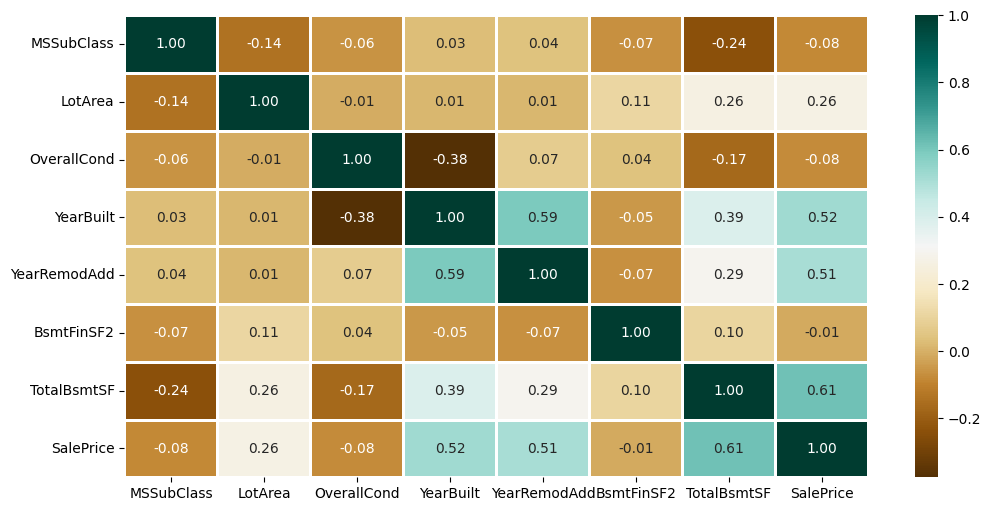

In [7]:
numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

To analyze the different categorical features from each column, We could use barplots.

<Axes: title={'center': 'No. of Unique values of Categorical Features'}, xlabel='None'>

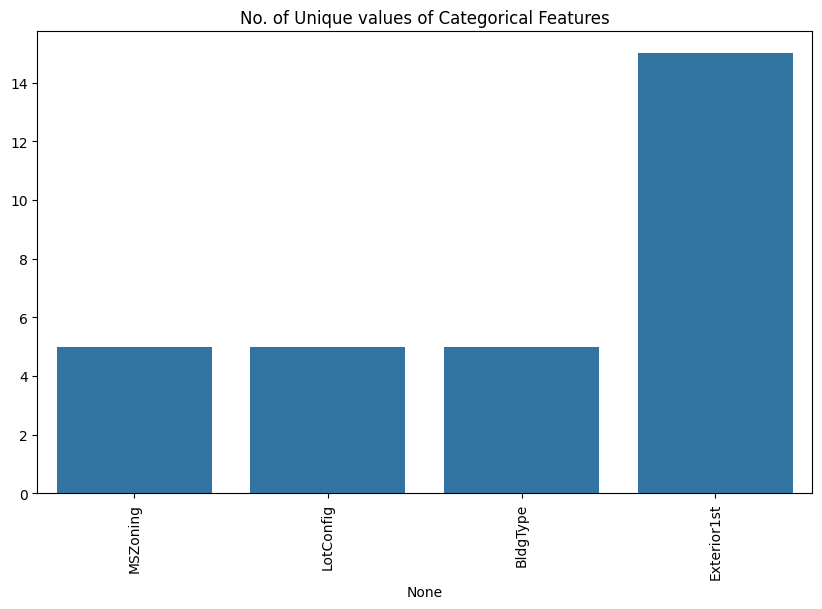

In [8]:
unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. of Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

This plot shows that Exterior1st has around 15 unique categories and other features have around  5 unique categories. To findout the actual count of each category we can plot the bargraph of each four features separately.

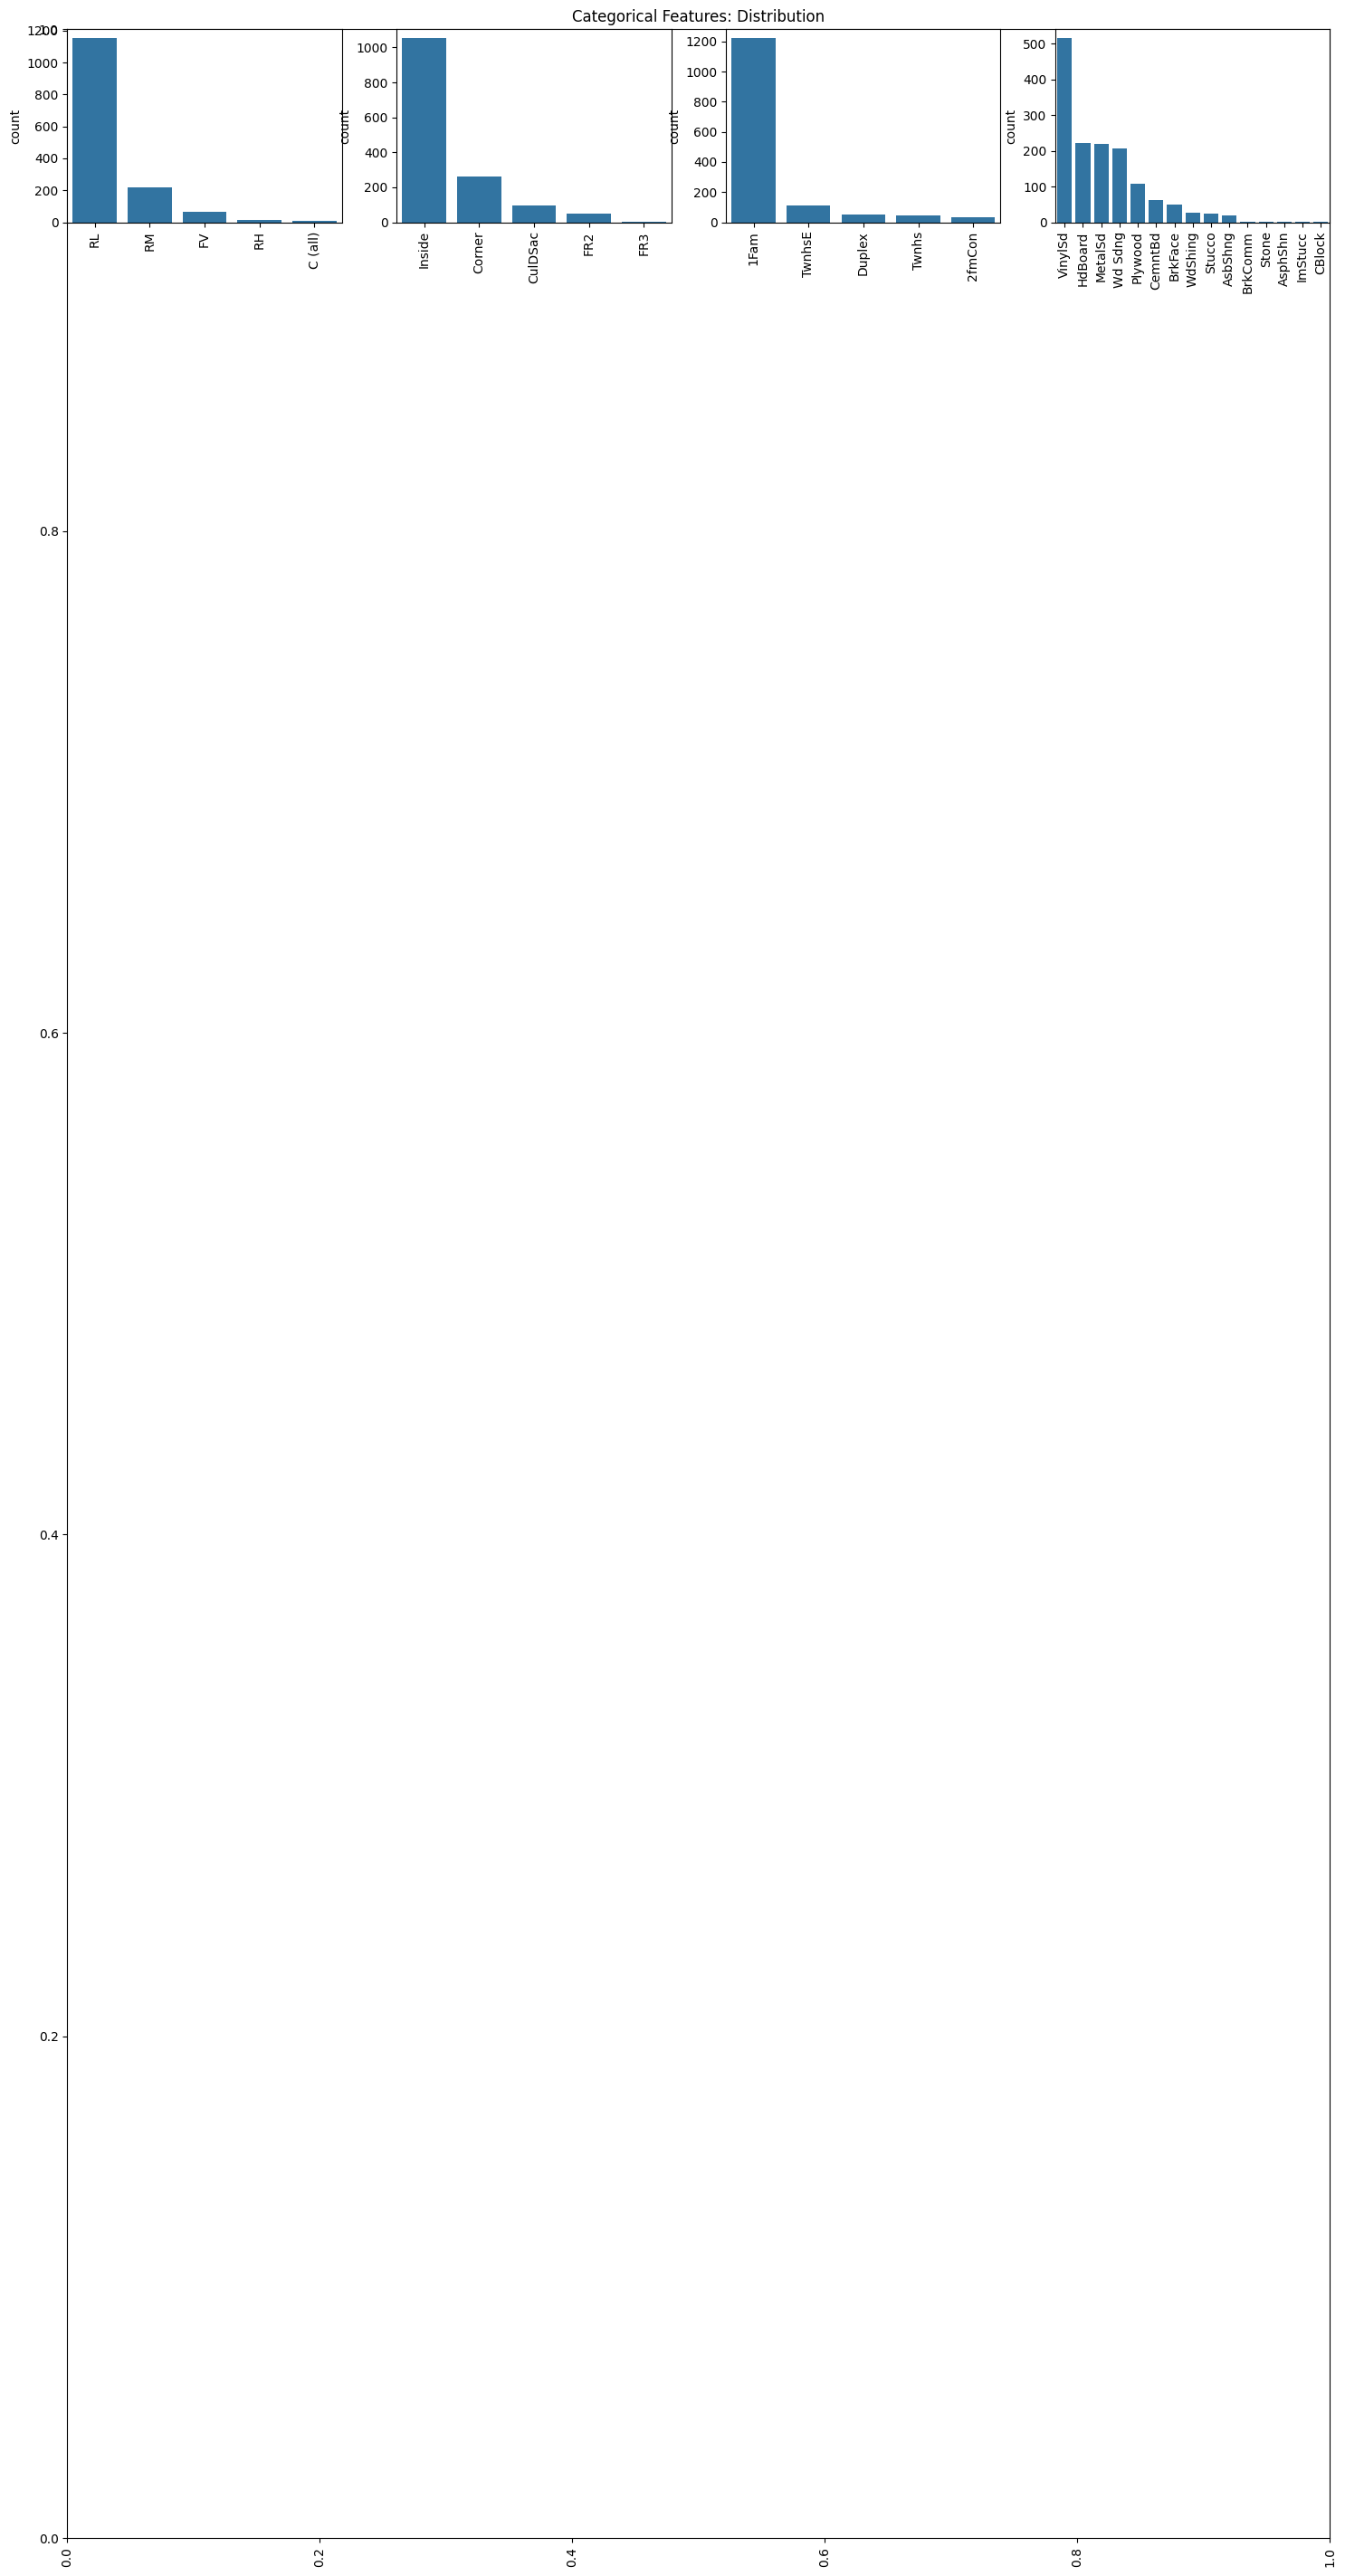

In [9]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

### Data Preprocessing

#### Preparing X and Y from training data

In [10]:
y = dataset.copy()["SalePrice"]
X = dataset.copy()
X.drop(["SalePrice"], axis=1, inplace=True)

X

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0,856
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0,1262
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0,920
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0,756
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0,1145
...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Inside,1Fam,5,1999,2000,VinylSd,0,953
1456,20,RL,13175,Inside,1Fam,6,1978,1988,Plywood,163,1542
1457,70,RL,9042,Inside,1Fam,9,1941,2006,CemntBd,0,1152
1458,20,RL,9717,Inside,1Fam,6,1950,1996,MetalSd,1029,1078


In [11]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

#### One-hot encode categorical features
- We use drop_first=True to avoid multicollinearity (dummy variable trap). If it's not part of any category, it has to part of dropped category.
- Setting dtype=int ensures the encoded values are integers (0 or 1) instead of default type boolean.

In [12]:
X = pd.get_dummies(X, drop_first=True, dtype=int)

X

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,MSZoning_FV,MSZoning_RH,MSZoning_RL,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0,856,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,20,9600,8,1976,1976,0,1262,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,60,11250,5,2001,2002,0,920,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,70,9550,5,1915,1970,0,756,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,60,14260,5,2000,2000,0,1145,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,5,1999,2000,0,953,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1456,20,13175,6,1978,1988,163,1542,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1457,70,9042,9,1941,2006,0,1152,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1458,20,9717,6,1950,1996,1029,1078,0,0,1,...,0,0,0,1,0,0,0,0,0,0


#### Feature Scaling (Normalization/Standardization)

In [13]:
X = (X - X.mean()) / X.std()

X

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,MSZoning_FV,MSZoning_RH,MSZoning_RL,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.073350,-0.207071,-0.517023,1.050634,0.878367,-0.288554,-0.459145,-0.215785,-0.105227,0.517956,...,-0.208741,-0.423319,-0.026171,-0.421067,-0.282537,-0.037024,-0.131946,1.35414,-0.405169,-0.134606
1,-0.872264,-0.091855,2.178881,0.156680,-0.429430,-0.288554,0.466305,-0.215785,-0.105227,0.517956,...,-0.208741,-0.423319,-0.026171,2.373290,-0.282537,-0.037024,-0.131946,-0.73797,-0.405169,-0.134606
2,0.073350,0.073455,-0.517023,0.984415,0.829930,-0.288554,-0.313261,-0.215785,-0.105227,0.517956,...,-0.208741,-0.423319,-0.026171,-0.421067,-0.282537,-0.037024,-0.131946,1.35414,-0.405169,-0.134606
3,0.309753,-0.096864,-0.517023,-1.862993,-0.720051,-0.288554,-0.687089,-0.215785,-0.105227,0.517956,...,-0.208741,-0.423319,-0.026171,-0.421067,-0.282537,-0.037024,-0.131946,-0.73797,2.466416,-0.134606
4,0.073350,0.375020,-0.517023,0.951306,0.733056,-0.288554,0.199611,-0.215785,-0.105227,0.517956,...,-0.208741,-0.423319,-0.026171,-0.421067,-0.282537,-0.037024,-0.131946,1.35414,-0.405169,-0.134606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073350,-0.260471,-0.517023,0.918196,0.733056,-0.288554,-0.238040,-0.215785,-0.105227,0.517956,...,-0.208741,-0.423319,-0.026171,-0.421067,-0.282537,-0.037024,-0.131946,1.35414,-0.405169,-0.134606
1456,-0.872264,0.266316,0.381612,0.222899,0.151813,0.721865,1.104547,-0.215785,-0.105227,0.517956,...,-0.208741,-0.423319,-0.026171,-0.421067,3.536940,-0.037024,-0.131946,-0.73797,-0.405169,-0.134606
1457,0.309753,-0.147760,3.077516,-1.002149,1.023678,-0.288554,0.215567,-0.215785,-0.105227,0.517956,...,4.787350,-0.423319,-0.026171,-0.421067,-0.282537,-0.037024,-0.131946,-0.73797,-0.405169,-0.134606
1458,-0.872264,-0.080133,0.381612,-0.704164,0.539309,6.090101,0.046889,-0.215785,-0.105227,0.517956,...,-0.208741,-0.423319,-0.026171,2.373290,-0.282537,-0.037024,-0.131946,-0.73797,-0.405169,-0.134606


## Training

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y, test_size=0.2, random_state=42)

y_train, y_test = y_train.values.reshape(-1, 1), y_test.values.reshape(-1, 1)

In [15]:
# Initialize weights and bias
np.random.seed(42)
w = np.random.randn(X_train.shape[1], 1)
b = np.random.randn(1)

# Training hyperparameters
learning_rate = 0.01
iterations = 1000
m = len(y_train)

# Gradient Descent
costs = []
for i in range(iterations):
    y_pred = np.dot(X_train, w) + b
    error = y_pred - y_train
    cost = (1/(2*m)) * np.sum(error**2)
    costs.append(cost)

    # Compute gradients
    dw = (1/m) * X_train.T.dot(error)
    db = (1/m) * np.sum(error)

    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    if i % 100 == 0:
        print(f"Iteration {i}: Cost = {cost:.2f}")


Iteration 0: Cost = 19442848728.99
Iteration 100: Cost = 3561585821.20
Iteration 200: Cost = 1592384769.31
Iteration 300: Cost = 1303532528.65
Iteration 400: Cost = 1245777719.33
Iteration 500: Cost = 1223464107.82
Iteration 600: Cost = 1208940963.10
Iteration 700: Cost = 1197749445.36
Iteration 800: Cost = 1188801834.98
Iteration 900: Cost = 1181589739.81


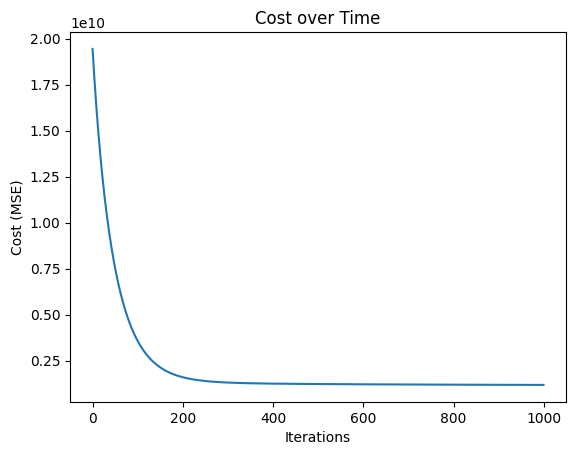

In [16]:
plt.plot(range(iterations), costs)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost over Time")
plt.show()

In [17]:
# Predict on test data
y_test_pred = np.dot(X_test, w) + b

# Compute RMSE
rmse = np.sqrt(np.mean((y_test - y_test_pred)**2))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 54280.73


In [18]:
example = X_test[53]
pred_price = example.dot(w) + b
print(f"Predicted Price: ${pred_price[0]:,.2f}")

Predicted Price: $255,720.67


In [19]:
y_test[53]

array([287000])

In [20]:
accuracy = 100 - np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 79.78%
